In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

In [5]:
df = pd.read_csv("eth_illicit_features.csv")
df.head()

,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


In [6]:
df.shape

(12146, 34)

In [8]:
df.isna().sum()


address                    0
flag                       0
minTimeBetweenSentTnx      0
maxTimeBetweenSentTnx      0
avgTimeBetweenSentTnx      0
minTimeBetweenRecTnx       0
maxTimeBetweenRecTnx       0
avgTimeBetweenRecTnx       0
lifetime                   0
sentTransactions           0
receivedTransactions       0
createdContracts           0
numUniqSentAddress         0
numUniqRecAddress          0
minValSent                 0
maxValSent                 0
avgValSent                 0
minValReceived             0
maxValReceived             0
avgValReceived             0
totalTransactions          0
totalEtherSent             0
totalEtherReceived         0
totalEtherSentContracts    0
totalEtherBalance          0
activityDays               0
dailyMax                   0
ratioRecSent               0
ratioSentTotal             0
ratioRecTotal              0
giniSent                   0
giniRec                    0
txFreq                     0
stdBalanceEth              0
dtype: int64

In [14]:
X = df.drop(['address', 'flag'], axis=1)
y = df.flag

In [15]:
reduced_feat = PCA(n_components=2).fit_transform(X)

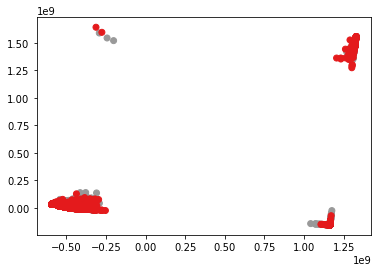

In [29]:
plt.scatter(reduced_feat[:,0], reduced_feat[:,1], c = y, cmap = plt.cm.Set1)

In [21]:
np.mean(df.flag  == 1)

0.42400790383665404

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [25]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
start = time.time()
pred = knn.predict(X_test)
end = time.time()
end-start

0.2055952548980713

In [34]:
train_pred = knn.predict(X_train)
np.mean(train_pred == y_train)

0.8708539167254764

In [27]:
np.mean(pred == y_test)

0.8529088913282108

In [39]:
acc = []
for i in range(1,11):
    for d in range(11,20):
        reduced_feat = PCA(n_components=d).fit_transform(X_train)
        reduced_labels = PCA(n_components=d).fit_transform(X_test)
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(reduced_feat, y_train)
        pred = knn.predict(reduced_labels)
        acc = np.mean(pred == y_test)
        print('accuracy: ' + str(round(acc, 2)) + 'neighbor:' + str(i) + ' dimmensions: ' + str(d))
acc

accuracy: 0.69neighbor:1 dimmensions: 11
accuracy: 0.69neighbor:1 dimmensions: 12
accuracy: 0.69neighbor:1 dimmensions: 13
accuracy: 0.69neighbor:1 dimmensions: 14
accuracy: 0.69neighbor:1 dimmensions: 15
accuracy: 0.69neighbor:1 dimmensions: 16
accuracy: 0.69neighbor:1 dimmensions: 17
accuracy: 0.69neighbor:1 dimmensions: 18
accuracy: 0.69neighbor:1 dimmensions: 19
accuracy: 0.69neighbor:2 dimmensions: 11
accuracy: 0.69neighbor:2 dimmensions: 12
accuracy: 0.69neighbor:2 dimmensions: 13
accuracy: 0.69neighbor:2 dimmensions: 14
accuracy: 0.69neighbor:2 dimmensions: 15
accuracy: 0.69neighbor:2 dimmensions: 16
accuracy: 0.69neighbor:2 dimmensions: 17
accuracy: 0.69neighbor:2 dimmensions: 18
accuracy: 0.69neighbor:2 dimmensions: 19
accuracy: 0.7neighbor:3 dimmensions: 11
accuracy: 0.7neighbor:3 dimmensions: 12
accuracy: 0.7neighbor:3 dimmensions: 13
accuracy: 0.7neighbor:3 dimmensions: 14
accuracy: 0.7neighbor:3 dimmensions: 15
accuracy: 0.7neighbor:3 dimmensions: 16
accuracy: 0.7neighbor:

0.7738748627881449